# Lab Three : Extending Logistic Regression

## By Zekai Wang
## Master of Applied Statistics and Data Analytics
## 10/10/2019

# 1 Business Understanding

Forest ecosystems are one of the most common and important ecosystems on Earth. The world's forests hold importance for all of their inhabitants as well as for the overall health of the planet. But with the increasing frequency of human activities and the increasing greenhouse effect in recent years, forest ecosystems, as well as certain types of trees, are being threatened as never before. For example, Amazon rainforest, which is the largest tropical forest on Earth, suffered from a fire damage a few months ago. This fire results in both the devastating loss of precious Amazonian rainforest and the release of massive amounts of $CO_2$ into the air. Therefore, we urgently need to take steps to protect our forests.

Protecting the diversity of trees is an important part of protecting forest ecosystems. But we have a lot of difficulties in classifying trees. For example, it is difficult to distinguish the difference between trees with the naked eye and it is also difficult to measure some variables of the tree itself without destroying trees itself(e.g. cutting trees).So if government organizations and nature conservation organizations can determine the types of trees in this area by measuring some easily measurable variables around the trees, then they can not only ensure the accuracy of the trees but also do not harm the trees and the surrounding areas ecosystem. Therefore, the goal of this lab assignment is to find a classification model that predicts the types of trees in this area by variables around the trees, such as soil type and vertical distance to nearest surface water features. The model can be both deployed or used mostly for offline analysis. That is the nature conservation organizations not only can create a platform that can be analyzed in real time once data is acquired, but also they can analyze anytime they need. 

For practical use, we must not only guarantee a high overall accuracy, but also we need to have a relatively reasonable false positive/negative rate. This is because there are 7 different type trees in our dataset. The overall accuarcy cannot represent the performance for some certain types. For example, if our overall accuracy is 89% but for type 4 , all predictions are wrong, then the model is useless to predict this certain type of tree.

# 2 Dataset Description

The dataset is from kaggle and contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. It contains 581012 observations, 54 features, and 1 outcome - "Cover Type". 

For the categorical variables "Soil Type"(40 types) and "Wilderness Area"(4 types), they have already been processed into binary variables(one-hot encoding), which means "0" represents absence and "1" represents presence. For the outcome variable - "Cover Type", there are 7 types in this variable and we also need to process it into 7 binary cloumns. They are 1 - Spruce/Fir, 2 - Lodgepole Pine, 3 - Ponderosa Pine, 4 - Cottonwood/Willow, 5 - Aspen, 6 - Douglas-fir, 7 - Krummholz. 

For the numerical variables, because there is great difference in their scale, which can have a bad impact on prediction. I standardized these numerical data before I build models.

In [23]:
%%time
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
tree = pd.read_csv('covtype.csv')

CPU times: user 2.3 s, sys: 461 ms, total: 2.76 s
Wall time: 2.49 s


Because there are too many observations in dataset, I randomly selected 20,000 observations in this lab assignment.

In [125]:
r = np.random.randint(0,len(tree)-1,20000)
tree_sub = tree.loc[r,:]
print('The number of observations in subset is:',len(tree_sub))

The number of observations in subset is: 20000


In [110]:
#import random
#random.seed(5)
#index_list = list()
#tree_grouped2 = tree.groupby(by='Cover_Type')
#for key in tree_grouped2.groups.keys():
#    slice1 = random.sample(list(tree_grouped2.groups[key]), 2000)
#    index_list.append(slice1)
#r = index_list[0]+index_list[1]+index_list[2]+index_list[3]+index_list[4]+index_list[5]+index_list[6]

In [126]:
tree_sub = tree.loc[r,:]
print('The number of observations in subset is:',len(tree_sub))

The number of observations in subset is: 20000


In [127]:
tree_sub.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [128]:
tree_sub.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
292077,2292,137,28,30,12,1605,249,216,74,685,...,0,0,0,0,0,0,0,0,0,3
307826,3049,101,19,60,7,875,248,212,85,2118,...,0,0,0,0,0,0,0,0,0,1
4264,2820,41,5,42,0,1342,221,228,143,972,...,0,0,0,0,0,0,0,0,0,5
339997,2869,359,11,295,-14,1552,204,220,154,2917,...,0,0,0,0,0,0,0,0,0,1
189345,3174,108,3,404,12,4248,225,236,146,972,...,0,0,0,0,0,0,0,0,0,2


In [755]:
from sklearn.preprocessing import StandardScaler

std1 = StandardScaler()
tree_std = tree_sub[tree_sub.columns[0:10]]

std_scale = std1.fit(tree_std)
tree_std1 = std_scale.transform(tree_std)

tree_std1_col = pd.DataFrame(tree_std1, index=list(range(0,20000)),columns=tree_std.columns) 
tree_sub.update(tree_std1_col)
tree_sub.head()

/Users/zekaiwang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-2.461805,-0.158164,1.849592,-1.144542,-0.585820,-0.486816,1.386759,-0.368528,-1.793320,-1.001213,...,0,0,0,0,0,0,0,0,0,3
1,0.313375,-0.480472,0.649434,-1.001573,-0.672341,-0.953162,1.349251,-0.568936,-1.506144,0.118801,...,0,0,0,0,0,0,0,0,0,1
2,1.680825,1.587805,-0.817522,0.837836,0.123579,1.560255,-0.413612,0.332938,0.660752,1.809384,...,0,0,0,0,0,0,0,0,0,5
3,-0.346509,1.829398,-0.417373,0.118348,-1.035733,-0.520674,-0.301087,-0.168121,0.295230,0.743290,...,0,0,0,0,0,0,0,0,0,1
4,0.771628,-0.417801,-1.484181,0.637801,-0.585820,1.201613,0.486574,0.633510,0.086375,-0.776898,...,0,0,0,0,0,0,0,0,0,2


# 3 Data Understanding and Visualization
First, I explored each label of outcomes variable. Since this data set does not have many variables (10 numerical variables and the other are one hot encoding, which belongs to soil type and wildness area). 

According to the table and bar chart below it is an imbalanced dataset, because most of observations belong to type 1 and type 2 tree.

In [129]:
tree_grouped = tree_sub.groupby(by='Cover_Type')
print(tree_grouped.Cover_Type.count())
print('---------------------------------------')
print(tree_grouped.Cover_Type.count() / len(tree_sub))

Cover_Type
1    7150
2    9857
3    1296
4      82
5     299
6     611
7     705
Name: Cover_Type, dtype: int64
---------------------------------------
Cover_Type
1    0.35750
2    0.49285
3    0.06480
4    0.00410
5    0.01495
6    0.03055
7    0.03525
Name: Cover_Type, dtype: float64


In [757]:
tree_grouped2 = tree.groupby(by='Cover_Type')
print(tree_grouped2.Cover_Type.count())
print('---------------------------------------')
print(tree_grouped2.Cover_Type.count() / len(tree))

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: Cover_Type, dtype: int64
---------------------------------------
Cover_Type
1    0.364605
2    0.487599
3    0.061537
4    0.004728
5    0.016339
6    0.029891
7    0.035300
Name: Cover_Type, dtype: float64


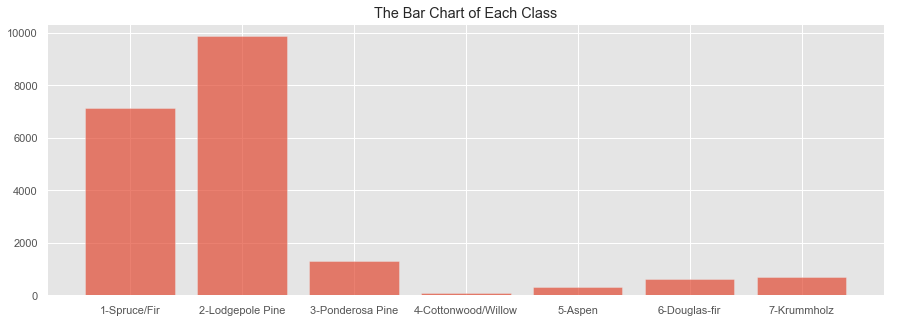

In [131]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
bars = ('1-Spruce/Fir','2-Lodgepole Pine','3-Ponderosa Pine','4-Cottonwood/Willow',
       '5-Aspen','6-Douglas-fir','7-Krummholz')
y_pos = np.arange(len(bars))
fig = plt.figure(figsize=(15,5))
plt.bar(y_pos, tree_grouped.Cover_Type.count(), alpha=0.7)
plt.xticks(y_pos, bars)
plt.title('The Bar Chart of Each Class')
plt.show()

Luckily, there is no missing values in dataset.

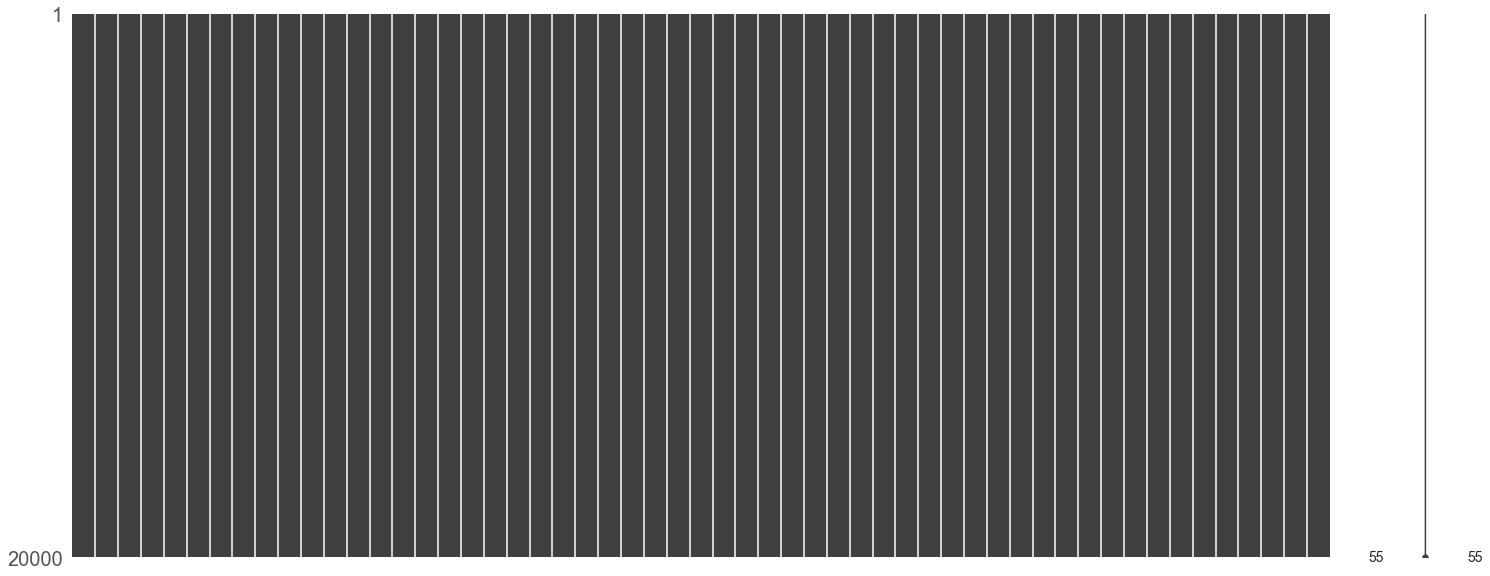

In [132]:
import missingno as mn
import matplotlib.pyplot as plt

mn.matrix(tree_sub.sort_values(by=['Cover_Type']))
plt.show()

## Feature Selection
For all numerical variables, I check the correlation between each two variables. It turns out the 'Hillshade_3pm' and 'Hillshade_9pm' has relatively high correlation and the other variables looks reasonable. Because there is not much variables in dataset and the highest correlation is 0.78, which is not too bad, I remain all variables in the dataset.

For the categorical variables, most observations belongs to soil type 29, which has greater than 4,000 and area type 1 and 3 has almost 90% observations. 

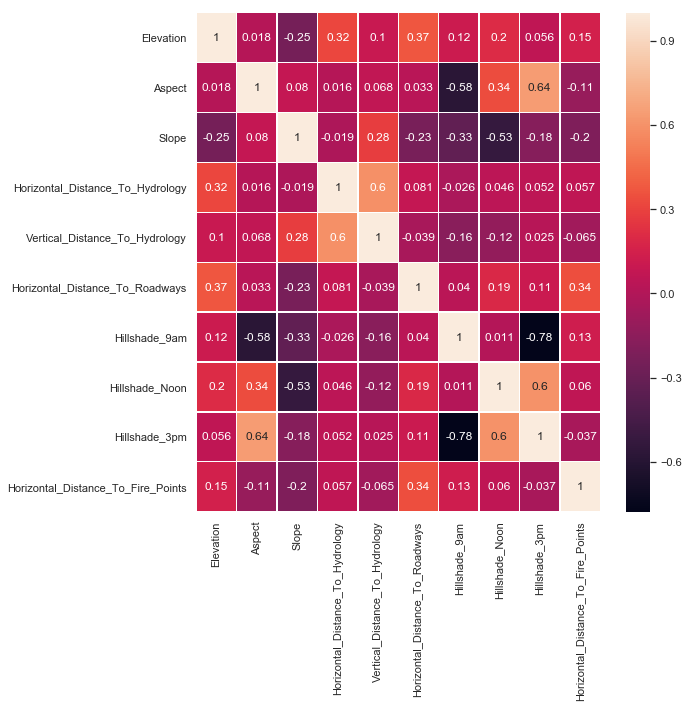

In [133]:
#correlation
vars_to_use = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'] 

# show the correlation between attributes 
import seaborn as sns
sns.set(style="darkgrid")
graph, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tree_sub[vars_to_use].corr(), annot=True,linewidths=0.3)
graph.tight_layout()
plt.show()

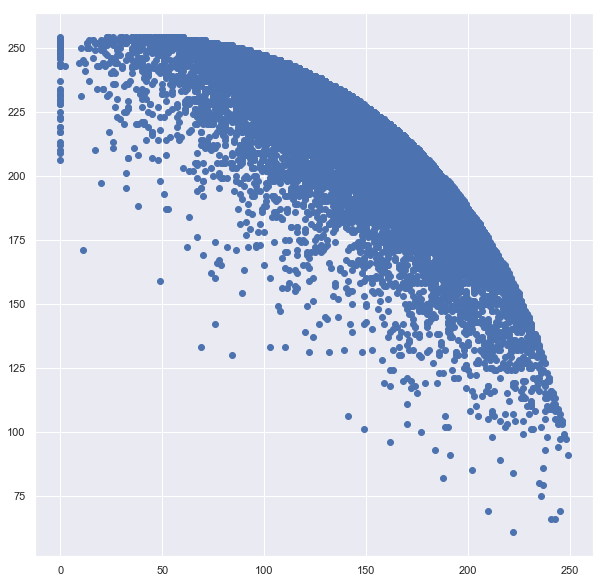

In [134]:
plt.figure(figsize=(10,10))
plt.scatter(tree_sub['Hillshade_3pm'],tree_sub['Hillshade_9am'])
plt.show()

In [787]:
list_area = list()
list_soil = list()
for i in range(10,14):
    list_area.append(np.sum(tree_sub[tree_sub.columns[i]]))
for j in range(14,len(tree_sub.columns)-1):
    list_soil.append(np.sum(tree_sub[tree_sub.columns[j]]))
area_type = list(range(1,5))
soil_type = list(range(1,41))

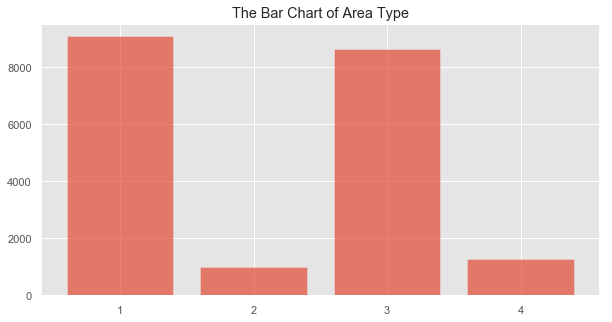

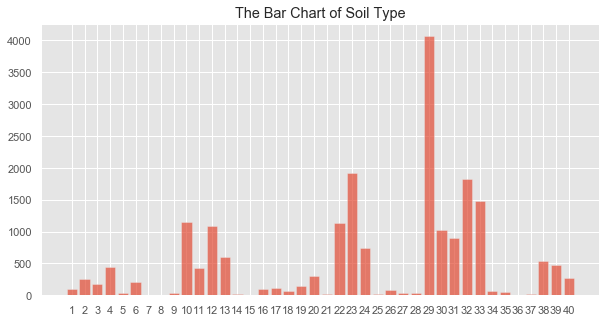

In [795]:
plt.style.use('ggplot')

y_area= np.arange(len(area_type ))
fig = plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.bar(y_area, list_area, alpha=0.7)
plt.xticks(y_area, area_type)
plt.title('The Bar Chart of Area Type')

y_soil= np.arange(len(soil_type ))
fig = plt.figure(figsize=(22,5))
plt.subplot(1,2,1)
plt.bar(y_soil, list_soil, alpha=0.7)
plt.xticks(y_soil, soil_type)
plt.title('The Bar Chart of Soil Type')

plt.show()

# 80/20 split 
Based on the first bar chart and table(class type), this dataset is imbalanced - the most observations belongs to the 1st and 2nd class. Therefore, if I use 80/20 data split for this imbalanced dataset, it might result in that there is few for some classes such as 4-Cottonwood/Willow or 5-Aspen in my test dataset and the logistic regression model has higher possible to focus on the marjority class, which will cause a biased result for the minority class. So we cannot use 80/20 data split.

Although it is not appropriate for this data set to do 80/20 data split, we still use this method.

In [378]:
from sklearn.model_selection import train_test_split
X =tree_sub.drop(tree.columns[-1],axis=1)
y = tree_sub.Cover_Type
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)
X_train.index = list(range(0,len(X_train)))
X_test.index = list(range(0,len(X_test)))

# 3 logistic regression 

I first create a custom, one-versus-all logistic regression classifier. it has 5 variables options, eta means the learning speed, method is optimized method, which contain: {'hessian','sgd','steepest'}. 'reg' represents regularization method, which contains {'L1','L2','both','None'}. 'iterations' means the number of iterations and C means the regularization coefficient.

In [640]:
# First is binary logistic regression
class BinaryLogisticRegression:
    def __init__(self, eta, method, reg, iterations=20, C=0.001):
        self.eta = eta
        self.method = method
        self.reg = reg
        self.iters = iterations
        self.C = C
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) 
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # stochastic gradient calculation 
    def sgd_get_gradient(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        if self.reg == 'L1':
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        elif self.reg == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.reg == 'both':
            gradient[1:] += -2 * self.w_[1:] * self.C - np.sign(self.w_[1:]) * self.C
        elif self.reg == 'None':
            gradient[1:] += 0
                
        return gradient
    
    # Hessian
    def hessian_get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel()
        if self.reg == 'L1':
            hessian = X.T @ np.diag(g*(1-g)) @ X - self.C
        elif self.reg == 'L2':
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C
        elif self.reg == 'both':
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C - self.C
        elif self.reg == 'None':
            hessian = X.T @ np.diag(g*(1-g)) @ X 
                
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ gradient
    
    # vectorized gradient calculation with regularization using L2 Norm
    def steepest_get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        if self.reg == 'L1':
            gradient[1:] += -np.sign(self.w_[1:]) * self.C
        elif self.reg == 'L2':
            gradient[1:] += -2 * self.w_[1:] * self.C
        elif self.reg == 'both':
            gradient[1:] += -2 * self.w_[1:] * self.C - np.sign(self.w_[1:]) * self.C
        elif self.reg == 'None':
            gradient[1:] += 0
                
        
        return gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            if self.method == 'steepest':
                gradient = self.steepest_get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate 
            elif self.method == 'sgd':
                gradient = self.sgd_get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate 
            elif self.method == 'hessian':
                gradient = self.hessian_get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate
                


In [573]:
#Then I create a multi logistic regression class
class LogisticRegression:
    def __init__(self, eta, method, reg, iterations=20, C=0.001):
        self.eta = eta
        self.method = method
        self.reg = reg
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(eta=self.eta,
                                           method=self.method,
                                           reg = self.reg,
                                           iterations=self.iters,
                                           C=self.C
                                          )
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    

In [682]:
#Test
%%time
from sklearn.metrics import accuracy_score
tt = LogisticRegression(eta=0.1, method='hessian',reg='L2',iterations=3, C=1)
tt.fit(X_train,y_train)

yhat = tt.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.7015
CPU times: user 29 s, sys: 16.9 s, total: 45.9 s
Wall time: 13.4 s


# 4 Ajusting C

In this part, I select C from 0 to 0.02 the step is 0.001 and compare each C value in different optimized method and regularization method. Finally, I draw plots to show the result.

## Steepest

In [592]:
%%time
accu1_steep = list()
cost1_steep = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='steepest',reg='L1',iterations=500, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu1_steep.append(accuracy_score(y_test,yhat))
    cost1_steep.append(cost)


CPU times: user 10min 53s, sys: 42.6 s, total: 11min 36s
Wall time: 2min 52s


In [594]:
%%time
accu2_steep = list()
cost2_steep = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='steepest',reg='L2',iterations=500, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu2_steep.append(accuracy_score(y_test,yhat))
    cost2_steep.append(cost)


CPU times: user 10min 23s, sys: 41.5 s, total: 11min 4s
Wall time: 2min 44s


In [630]:
%%time
accu3_steep = list()
cost3_steep = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='steepest',reg='both',iterations=500, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu3_steep.append(accuracy_score(y_test,yhat))
    cost3_steep.append(cost)


CPU times: user 10min 23s, sys: 39.5 s, total: 11min 3s
Wall time: 2min 43s


## Stochastic

In [625]:
%%time
accu1_SGD = list()
cost1_SGD = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='sgd',reg='L1',iterations=1500, C=0.001)
    tt1.fit(X_train,y_train.as_matrix())
    yhat = tt1.predict(X_test)
    accu1_SGD.append(accuracy_score(y_test,yhat))
    cost1_SGD.append(cost)

/Users/zekaiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


CPU times: user 11 s, sys: 157 ms, total: 11.1 s
Wall time: 3.96 s


In [627]:
%%time
accu2_SGD = list()
cost2_SGD = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='sgd',reg='L2',iterations=1500, C=0.001)
    tt1.fit(X_train,y_train.as_matrix())
    yhat = tt1.predict(X_test)
    accu2_SGD.append(accuracy_score(y_test,yhat))
    cost2_SGD.append(cost)

/Users/zekaiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


CPU times: user 11.2 s, sys: 168 ms, total: 11.4 s
Wall time: 4.22 s


In [628]:
%%time
accu3_SGD = list()
cost3_SGD = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='sgd',reg='both',iterations=1500, C=0.001)
    tt1.fit(X_train,y_train.as_matrix())
    yhat = tt1.predict(X_test)
    accu3_SGD.append(accuracy_score(y_test,yhat))
    cost3_SGD.append(cost)

/Users/zekaiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


CPU times: user 11.5 s, sys: 156 ms, total: 11.7 s
Wall time: 4.52 s


## Hessian

In [632]:
%%time
accu1_hessian = list()
cost1_hessian = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='hessian',reg='L1',iterations=3, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu1_hessian.append(accuracy_score(y_test,yhat))
    cost1_hessian.append(cost)

CPU times: user 9min 57s, sys: 5min 43s, total: 15min 41s
Wall time: 4min 33s


In [646]:
%%time
accu2_hessian = list()
cost2_hessian = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='hessian',reg='L2',iterations=3, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu2_hessian.append(accuracy_score(y_test,yhat))
    cost2_hessian.append(cost)

CPU times: user 9min 59s, sys: 5min 44s, total: 15min 44s
Wall time: 4min 33s


In [648]:
%%time
accu3_hessian = list()
cost3_hessian = list()
for cost in np.arange(0,0.02,0.001):
    tt1 = LogisticRegression(eta=0.05, method='hessian',reg='both',iterations=3, C=cost)
    tt1.fit(X_train,y_train)
    yhat = tt1.predict(X_test)
    accu3_hessian.append(accuracy_score(y_test,yhat))
    cost3_hessian.append(cost)

CPU times: user 10min 8s, sys: 5min 49s, total: 15min 58s
Wall time: 4min 38s


## Data Visualization for Results

## L1

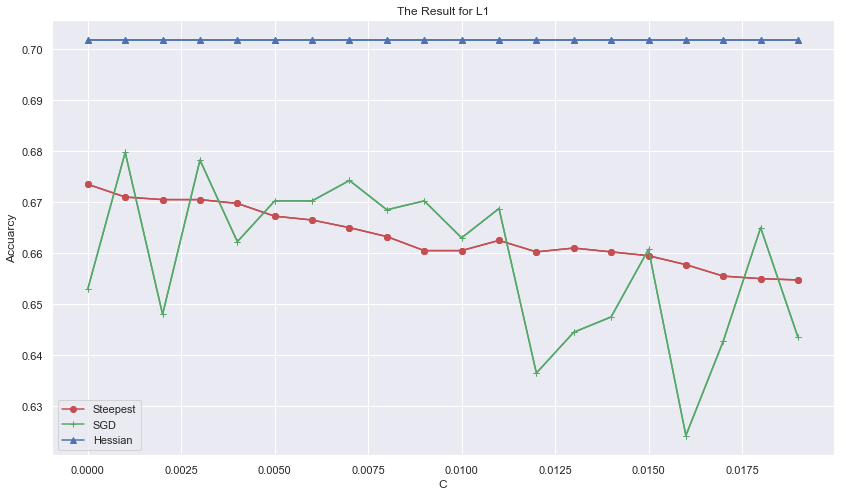

In [659]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14,8))

l1=plt.plot(cost1_steep,accu1_steep,'ro-',label='Steepest')
l2=plt.plot(cost1_SGD,accu1_SGD,'g+-',label='SGD')
l3=plt.plot(cost1_hessian,accu1_hessian,'b^-',label='Hessian')

plt.plot(cost1_steep,accu1_steep,'ro-',
         cost1_SGD,accu1_SGD,'g+-',
         cost1_hessian,accu1_hessian,'b^-')
plt.title('The Result for L1')
plt.xlabel('C')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

## L2

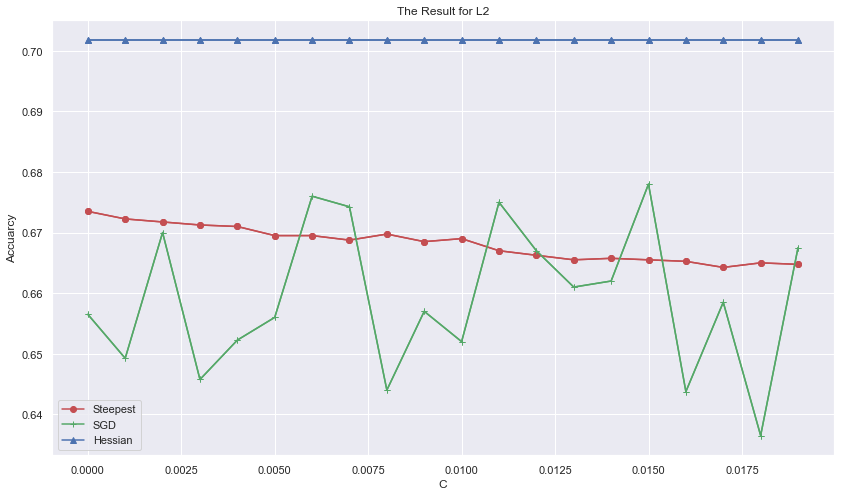

In [660]:
plt.figure(figsize=(14,8))

l1=plt.plot(cost2_steep,accu2_steep,'ro-',label='Steepest')
l2=plt.plot(cost2_SGD,accu2_SGD,'g+-',label='SGD')
l3=plt.plot(cost2_hessian,accu2_hessian,'b^-',label='Hessian')

plt.plot(cost2_steep,accu2_steep,'ro-',
         cost2_SGD,accu2_SGD,'g+-',
         cost2_hessian,accu2_hessian,'b^-')
plt.title('The Result for L2')
plt.xlabel('C')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

## L1 + L2

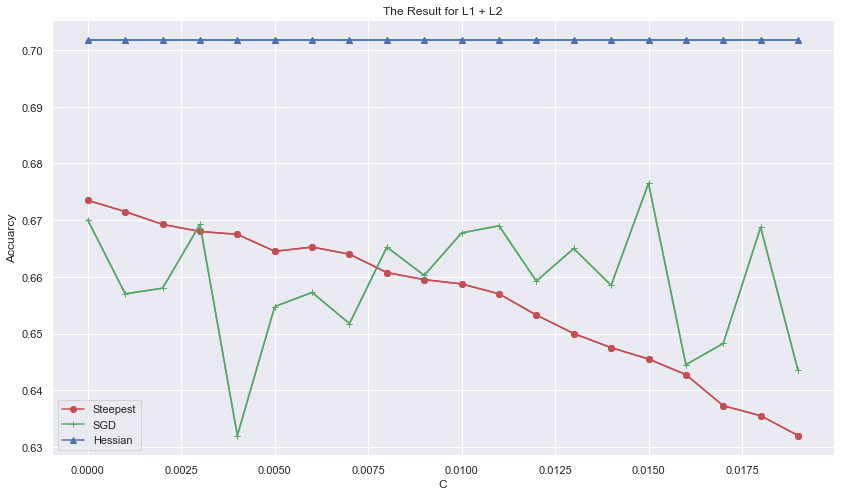

In [661]:
plt.figure(figsize=(14,8))

l1=plt.plot(cost3_steep,accu3_steep,'ro-',label='Steepest')
l2=plt.plot(cost3_SGD,accu3_SGD,'g+-',label='SGD')
l3=plt.plot(cost3_hessian,accu3_hessian,'b^-',label='Hessian')

plt.plot(cost3_steep,accu3_steep,'ro-',
         cost3_SGD,accu3_SGD,'g+-',
         cost3_hessian,accu3_hessian,'b^-')
plt.title('The Result for L1 + L2')
plt.xlabel('C')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

# 5 Performance Evaluation and Data Snooping

Based on three pictures above, we can see hessian method always have the best performance nomatter what the C is or which regularization we use. The best performance is 0.7015. For the SGD, we can see the performance is very random 
but overall stay between 0.63 - 0.67. For the steepest gradient descend, we can see it decreases as C increase from 0 to 0.02. Therefore, I conclude hessian has the best performance no matter which regularization used in the range of 0 to 0.2 for C. The reason why the accuracy of Hessian remains the same is that I think that the range of C I chose is a little small, and because the number of hessian iterations is only three, C does not have a critical impact on the final accuracy.

"Data snooping refers to statistical inference that the researcher decides to perform after looking at the data (as contrasted with pre-planned inference, which the researcher plans before looking at the data)." (https://web.ma.utexas.edu/users/mks/statmistakes/datasnooping.html). For this performance camparison, there is data snooping. This is because, I first noticed that there is a differnce between accuracy for each different C value and optimized method I used. For example, there is 3 optimized methods and 20 different C value. So if we do statistic inference for the accuracy difference, we have 60 total pairs need to process. Therefore, we need to change our significant level if we do this multiple inference.




# 6 Comparing to Scikit Learn

In this part，I compare the best results, which is hessian(L2 regularization and C=0.001) with the sklearn results. I tried some different parameters combinations for Sklearn and I found when solver = 'liblinear', max_iter = 500 and penalty = 'l2', C=1, Sklearn had the best performance, which is 0.7195.


In [700]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import accuracy_score
tt_sk = SKLogisticRegression(solver='liblinear' ,
                            max_iter=500,
                            penalty='l2',
                            C=1)

tt_sk.fit(X_train,y_train)
yhat = tt_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

/Users/zekaiwang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of:  0.7195
CPU times: user 558 ms, sys: 12.2 ms, total: 570 ms
Wall time: 568 ms


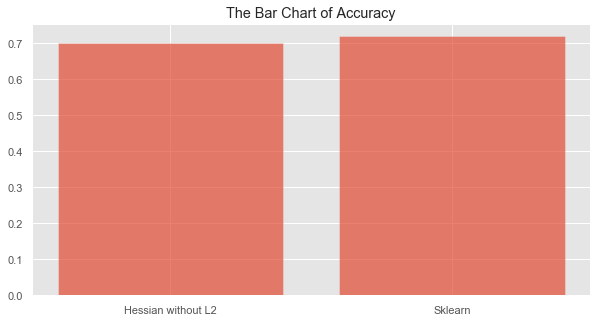

In [691]:
plt.style.use('ggplot')
bars = ('Hessian without L2','Sklearn')
y_pos = np.arange(len(bars))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, [0.7015,0.7195], alpha=0.7)
plt.xticks(y_pos, bars)
plt.title('The Bar Chart of Accuracy')
plt.show()

## Time

In [696]:
%%time
from sklearn.metrics import accuracy_score
tt = LogisticRegression(eta=0.1, method='hessian',reg='L2',iterations=3, C=0.001)
tt.fit(X_train,y_train)

yhat1 = tt.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat1))

Accuracy of:  0.7015
CPU times: user 30.2 s, sys: 17.7 s, total: 47.9 s
Wall time: 14.3 s


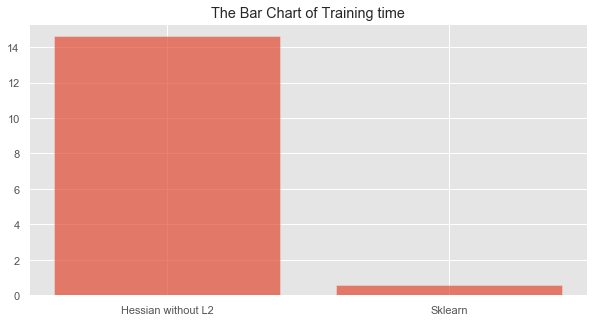

In [701]:
plt.style.use('ggplot')
bars = ('Hessian without L2','Sklearn')
y_pos = np.arange(len(bars))
fig = plt.figure(figsize=(10,5))
plt.bar(y_pos, [14.6,0.568], alpha=0.7)
plt.xticks(y_pos, bars)
plt.title('The Bar Chart of Training time')
plt.show()

In [699]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat,labels=[1,2,3,4,5,6,7])

array([[ 946,  463,    1,    0,    0,    0,   20],
       [ 308, 1606,   51,    0,    0,    0,    6],
       [   6,   26,  227,    0,    0,    0,    0],
       [   8,    0,    8,    0,    0,    1,    0],
       [   6,   46,    8,    0,    0,    0,    0],
       [   7,   47,   67,    0,    0,    1,    0],
       [ 105,   10,    0,    0,    0,    0,   26]])

In [702]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat1,labels=[1,2,3,4,5,6,7])

array([[ 994,  412,    1,    0,    0,    0,   23],
       [ 330, 1585,   50,    0,    0,    1,    5],
       [   5,   24,  223,    1,    0,    6,    0],
       [   0,    0,    4,   12,    0,    1,    0],
       [   7,   44,    8,    0,    0,    0,    1],
       [   0,   46,   65,    4,    0,    7,    0],
       [  74,   10,    0,    0,    0,    0,   57]])

For the accuracy, Sklearn's result(0.7195) is slightly higher than hessian(0.7015). This kind of small difference can be ignored in practical application, so both can be said to be very good in accuracy. If we look further at the results of the confusion matrices(which are below), we will find more useful information about our evaluation accuracy. For trees of type1 and type2, both sklearn and hessian have a higher probability of incorrectly predicting type1 as type2(sklearn:28%,hessian:32%) and type2 incorrectly as type1(sklearn:19%,hessian:18.5%). Also, for type 5, both methods incorrectly predict the result(accuarcy equal 0) and type 6 and 7 have less tha 50% accuarcy. So, logistic regression cannot predict type 5, type 6 and type 7, we need to do deeper study on type 5 statistics or find a new model to predict type 5 correctly. In addtion, I find it is an imbalanced dataset. For example, type 1 and type 2 have more than 1,000 observations, respectively, but type 4 and type 5 just contain less than 100 observations. This will have a big impact on our model and prediction accuracy.

However, for the training time, Sklearn is more than 20 times faster than hessian(568ms vs. 14.6s). In this lab, because I considered the impact of calculation time, I chose only 20,000 observations from the original dataset with 500,000 observations when selecting the dataset.So if we use the original dataset to calculate the hessian, it will cost more in time. Therefore, considering the speed of calculation, sklearn is obviously better than hessian.

# 7 Deployment

The purpose of this lab is to predict the classification of trees by counting the data around the trees and performing modeling analysis.Therefore, it is very important for this model to improve the overall prediction accuracy rate and the correct rate of specific tree type prediction. In addition, training model time is also important for the model. This is because if we want the model to have practical value, we need to collect a large amount of data from various places, and we also have a large number of variables depending on the location of the collection.This means that our datasets may have millions or even tens of millions of observations and a large number of variables and we will also collect new observations everday. For most charitable organizations, they may not have the money to improve the quality of computer equipment，so it is especially important to improve the calculation speed of the algorithm so that they can do prediction daily.

Therefore, for the accuarcy, both sklearn and hessian(custom) have reasonable overall accuarcy, but for type 4 type 5 and type 6, we cannot use either of them to do prediction, because all results are wrong. For other types, the result 
can be used as a more reasonable reference result.

On the other hand, because sklearn runs much faster than hessian, we should choose sklearn in terms of speed.

In summary, I will recommand scikit-learn model to predict type 1, 2, 3, 4 trees due to the reasonable accuracy and faster traning speed. 